In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)
pd.set_option('display.width', 1000)

In [ ]:
df = pd.read_csv('hotel_bookings_data.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Temuan:
1. Terdapat 4 kolom yang memiliki missing value yaitu kolom `city`, `agent`, `company`, dan `children`
2. Kolom `company` memiliki nilai missing value yang besar sehingga bisa diisi menggunakan nilai 0
3. Isi nilai kosong pada kolom `agent` menggunakan nilai 0, isi nilai kosong pada kolom `city` menggunakan nilai unknown, dan isi nilai kosong pada kolom `children` menggunakan nilai 0

# Data Preprocessing

## Mengatasi data null / data kosong

In [ ]:
# fill missing value

# isi nilai missing value pada kolom company dengan nilai 0
df['company'] = df['company'].fillna(0)
# isi nilai missing value pada kolom agent dengan nilai 0
df['agent'] = df['agent'].fillna(0)
# isi nilai missing value pada kolom city dengan nilai unknown
df['city'] = df['city'].fillna('unknown')
# isi nilai missing value pada kolom children dengan nilai 0
df['children'] = df['children'].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
df.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

## Mengatasi data yang tidak sesuai

In [ ]:
# membagi data berdasarkan type datanya
category = df.select_dtypes(include='object')
numerical = df.select_dtypes(exclude='object')

numerical_cols = numerical.columns.to_list()
category_cols = category.columns.to_list()

print("Data numerik: ", numerical_cols)
print("Data category: ", category_cols)

Data numerik:  ['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_weekdays_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'company', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
Data category:  ['hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']


In [ ]:
df[numerical_cols].describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,74.828319,10.775157,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,107.141953,53.943884,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [ ]:
df[category_cols].describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,178,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [ ]:
pd.unique(df['meal'])

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal', 'Undefined'],
      dtype=object)

Terdapat nilai Undefined pada kolom `meal` yang mana sama saja seperti nilai No Meal sehingga bisa diganti nilainya dengan nilai No Meal

In [ ]:
len(df[df['meal'] == 'Undefined'])

1169

In [ ]:
df.shape

(119390, 29)

In [ ]:
# drop nilai "undefined" ganti dengan No Meal pada kolom meal
df["meal"].replace("Undefined", "No Meal", inplace=True)

In [ ]:
pd.unique(df['meal'])

array(['Breakfast', 'Full Board', 'Dinner', 'No Meal'], dtype=object)

In [ ]:
df.shape

(119390, 29)

## Mengidentifikasi data-data yang tidak berhubungan

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out


In [ ]:
df2 = df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)]

In [ ]:
df2

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
2224,Resort Hotel,0,1,2017,December,41,6,0,3,0,0.0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,1,No Deposit,0.0,174.0,0,Family,0.00,0,0,Check-Out
2409,Resort Hotel,0,0,2017,December,42,12,0,0,0,0.0,0,No Meal,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,0.0,174.0,0,Personal,0.00,0,0,Check-Out
3181,Resort Hotel,0,36,2017,January,47,20,1,2,0,0.0,0,No Meal,Kota Batu,Groups,TA/TO,0,0,0,0,No Deposit,38.0,0.0,0,Family,0.00,0,0,Check-Out
3684,Resort Hotel,0,165,2017,February,53,30,1,4,0,0.0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,0.0,122,Family,0.00,0,0,Check-Out
3708,Resort Hotel,0,165,2017,February,53,30,2,4,0,0.0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,1,No Deposit,308.0,0.0,122,Family,0.00,0,0,Check-Out
4127,Resort Hotel,1,0,2018,April,8,15,0,0,0,0.0,0,No Meal,unknown,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,0.0,383.0,0,Personal,0.00,0,0,Canceled
9376,Resort Hotel,1,0,2018,January,48,21,0,0,0,0.0,0,No Meal,unknown,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,0.0,386.0,0,Bussiness,0.00,0,0,Canceled
31765,Resort Hotel,0,31,2018,February,53,27,2,8,0,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,28.00,1,0,Check-Out
32029,Resort Hotel,0,4,2019,March,2,14,0,1,0,0.0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,168.0,0.0,0,Family,0.00,0,0,Check-Out
32827,Resort Hotel,0,46,2019,March,4,25,3,9,0,0.0,0,No Meal,Kota Yogyakarta,Direct,Direct,0,0,0,8,No Deposit,0.0,0.0,0,Personal,0.00,0,0,Check-Out


Temuan:
1. Terdapat nilai 0 untuk kolom adults, children, dan babies

In [ ]:
# drop baris yang memiliki nilai 0 pada kolom adults, children, and babies
df.drop(df[(df['adults'] == 0) & (df['children'] == 0) & (df['babies'] == 0)].index, inplace=True)

In [ ]:
df.shape

(119210, 29)

In [ ]:
# membuat data baru yaitu guest untuk total pengunjung
df['guest'] = df['adults']+df['children']+df['babies']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


# Monthly Hotel Booking Analysis Based on Hotel Type

In [ ]:
df2 = df.copy()

## Perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


In [ ]:
df2_group_total_booking = df2.groupby(['hotel', 'arrival_date_month']).agg({'arrival_date_year': ['nunique'],
                                                                            'guest':['count']}).reset_index()
df2_group_total_booking.columns = ['hotel type', 'arrival_month', 'arrival_year', 'total_booking']
df2_group_total_booking

,hotel type,arrival_month,arrival_year,total_booking
0,City Hotel,April,2,4950
1,City Hotel,August,2,7885
2,City Hotel,December,2,7594
3,City Hotel,February,2,4114
4,City Hotel,January,2,4336
5,City Hotel,July,2,8221
6,City Hotel,June,2,7469
7,City Hotel,March,2,3730
8,City Hotel,May,2,6434
9,City Hotel,November,2,7392


Terlihat pada bulan oktokber dan september ini datanya diambil dari 3 tahun ke belakang sedangkan bulan yang lainnya diambil dari 2 tahun ke belakang maka diperlukan normalisasi dengan mencari rata-rata booking per bulannnya

In [ ]:
df2_group_total_booking['average_booking'] = round(df2_group_total_booking['total_booking']/df2_group_total_booking['arrival_year'])
df2_group_total_booking

,hotel type,arrival_month,arrival_year,total_booking,average_booking
0,City Hotel,April,2,4950,2475.0
1,City Hotel,August,2,7885,3942.0
2,City Hotel,December,2,7594,3797.0
3,City Hotel,February,2,4114,2057.0
4,City Hotel,January,2,4336,2168.0
5,City Hotel,July,2,8221,4110.0
6,City Hotel,June,2,7469,3734.0
7,City Hotel,March,2,3730,1865.0
8,City Hotel,May,2,6434,3217.0
9,City Hotel,November,2,7392,3696.0


urutkan berdasarkan bulan

In [ ]:
list_name_of_months = ['January', 'February', 'March', 'April', 'May', 'June', 
                       'July', 'August', 'September', 'October', 'November', 'December']
df2_group_total_booking['arrival_month'] = pd.Categorical(df2_group_total_booking['arrival_month'], categories=list_name_of_months, ordered=True)
df2_group_total_booking = df2_group_total_booking.sort_values(by=['hotel type', 'arrival_month'])
df2_group_total_booking

,hotel type,arrival_month,arrival_year,total_booking,average_booking
4,City Hotel,January,2,4336,2168.0
3,City Hotel,February,2,4114,2057.0
7,City Hotel,March,2,3730,1865.0
0,City Hotel,April,2,4950,2475.0
8,City Hotel,May,2,6434,3217.0
6,City Hotel,June,2,7469,3734.0
5,City Hotel,July,2,8221,4110.0
1,City Hotel,August,2,7885,3942.0
11,City Hotel,September,3,8071,2690.0
10,City Hotel,October,3,8967,2989.0


Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel (Hint: Perhatikan jenis plot yang digunakan)

Text(-0.5, 4900, 'Both types of hotels experienced a decrease in hotel bookings from august to september')

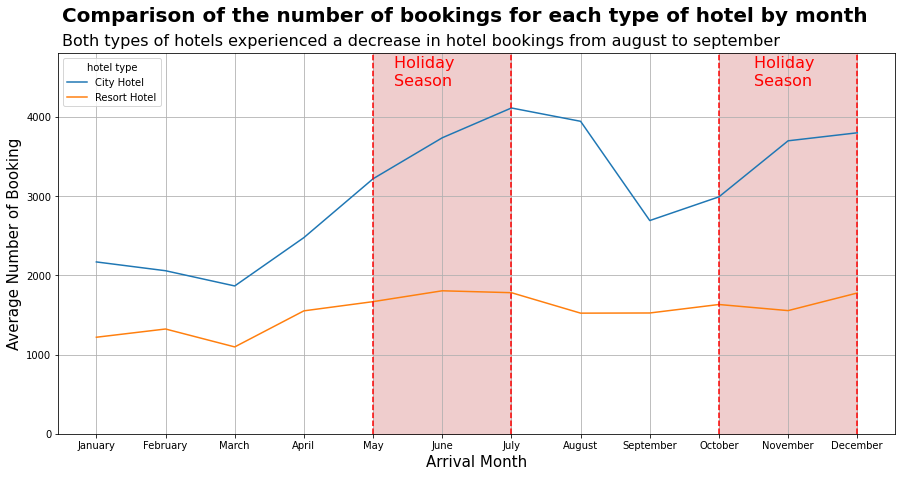

In [ ]:
plt.figure(figsize=(15,7)) # mengatur ukuran figure
sns.lineplot(x='arrival_month', y='average_booking', hue='hotel type', data=df2_group_total_booking)
plt.grid()

plt.xlabel('Arrival Month', fontsize=15)
plt.ylabel('Average Number of Booking', fontsize=15) 
plt.ylim(0, 4800) # membatasi sumbu y

plt.axvline(4, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(6, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=4.3, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(4,7,1), [[4800]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(9, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.axvline(11, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=9.5, y=4400, s='Holiday \nSeason', fontsize=16, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(9,12,1), [[4800]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.text(x=-0.5, y=5200, s="Comparison of the number of bookings for each type of hotel by month", 
         fontsize=20, fontweight='bold')
plt.text(x=-0.5, y=4900, s="Both types of hotels experienced a decrease in hotel bookings from august to september", 
         fontsize=16)

**Insight/Analisis:**

Analisis ini berfokus untuk melihat trend dari pemesanan hotel untuk setiap jenis hotel per bulannya. 

Kedua jenis hotel mendapatkan jumlah pemesanan terbanyak di sekitar bulan Juni dan Juli. Jika dipikirkan lebih dalam, waktu tersebut bertepatan dengan liburan Hari Raya dan liburan anak sekolah. 
Selain itu, di bulan lainnya yang tidak berbarengan dengan suatu libur apapun terlihat pemesanan jauh lebih rendah. Sehingga untuk Hotel Perkotaan mengalami penurunan signifikan pada bulan Agustus dan September.

Kemudian di bulan Oktokber dan Desember pemesanan hotel mengalami kenaikan seperti bulan Juni dan Juli, mungkin bulan tersebut adalah bulan disaat liburan hari tahun baru / hari natal.



# Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [ ]:
# copy datafraame
df3 = df2.copy()

In [ ]:
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,No Deposit,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,No Deposit,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,No Deposit,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,No Deposit,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0


In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_weekdays_nights        119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

Buatlah kolom baru yang berisi total durasi menginap. (Hint: Perhatikan kolom-kolom yang memuat informasi tentang durasi menginap)

In [ ]:
df3['total_duration'] = df3['stays_in_weekdays_nights'] + df3['stays_in_weekend_nights']
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,total_duration
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0.0,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,304.0,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,240.0,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2


Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan (Hint: Perhatikan persebaran datanya)

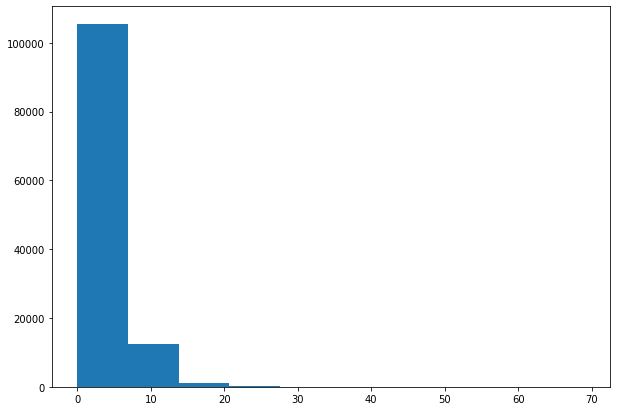

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(data = df3, x='total_duration')
plt.show()

Dikarenakan data persebaran total duration skew positif ke kanan yang mana orang menginap lebih dari 14 hari itu hanya sedikit maka datanya dikelompokkan dengan cara orang yang menginapnya lebih dari 14 hari dikelompokkan menjadi 15 hari

In [ ]:
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka


In [ ]:
df3['total_night_group'] = np.where(df3['total_duration'] > 14, 15,df3['total_duration'])
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,guest,total_duration,total_night_group
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,...,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,0
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,...,0.0,0,Personal,0.0,0,0,Check-Out,2.0,0,0
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,...,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,1
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,...,0.0,0,Personal,75.0,0,0,Check-Out,1.0,1,1
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,...,0.0,0,Personal,98.0,0,1,Check-Out,2.0,2,2


Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel (Perhatikan proporsi dari pemesanan yang dibatalkan)

In [ ]:
pd.unique(df3['is_canceled'])

array([0, 1])

In [ ]:
df3_group = df3.groupby(['hotel', 'is_canceled', 'total_night_group']).agg({'arrival_date_month': ['count']}).reset_index()
df3_group.columns = ['hotel_type', 'cancel', 'total_night', 'total_booking']
df3_group

,hotel_type,cancel,total_night,total_booking
0,City Hotel,0,0,251
1,City Hotel,0,1,9155
2,City Hotel,0,2,10983
3,City Hotel,0,3,11889
4,City Hotel,0,4,7694
...,...,...,...,...
59,Resort Hotel,1,11,74
60,Resort Hotel,1,12,68
61,Resort Hotel,1,13,25
62,Resort Hotel,1,14,186


In [ ]:
df3_pivot = df3_group.pivot_table(index=['hotel_type', 'total_night'], columns='cancel', values='total_booking').reset_index()
df3_pivot

cancel,hotel_type,total_night,0,1
0,City Hotel,0,251,13
1,City Hotel,1,9155,4103
2,City Hotel,2,10983,10432
3,City Hotel,3,11889,9482
4,City Hotel,4,7694,4853
5,City Hotel,5,3210,1775
6,City Hotel,6,1111,938
7,City Hotel,7,1245,808
8,City Hotel,8,205,176
9,City Hotel,9,119,93


In [ ]:
df3_pivot['percentage_cancel'] = round((df3_pivot[1]/(df3_pivot[0]+df3_pivot[1]))*100,2)
df3_pivot

cancel,hotel_type,total_night,0,1,percentage_cancel
0,City Hotel,0,251,13,4.92
1,City Hotel,1,9155,4103,30.95
2,City Hotel,2,10983,10432,48.71
3,City Hotel,3,11889,9482,44.37
4,City Hotel,4,7694,4853,38.68
5,City Hotel,5,3210,1775,35.61
6,City Hotel,6,1111,938,45.78
7,City Hotel,7,1245,808,39.36
8,City Hotel,8,205,176,46.19
9,City Hotel,9,119,93,43.87


Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)

In [ ]:
df3_pivot = df3_pivot[df3_pivot['total_night'] > 0]

Text(0, 102, "the percentage of 'city hotel' hotel types that have an increasing trend of canceled bookings based on length of stay")

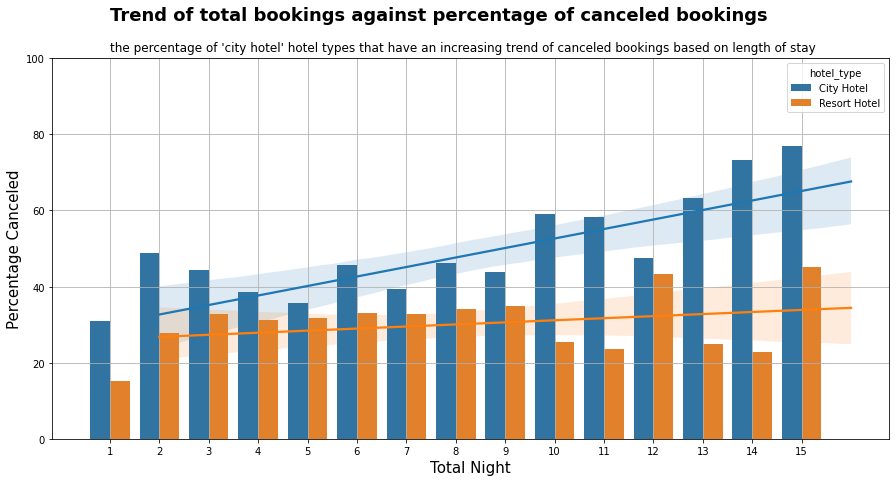

In [ ]:
plt.figure(figsize=(15,7)) # mengatur ukuran figure
sns.barplot(x='total_night', y='percentage_cancel', hue='hotel_type', data=df3_pivot)
sns.regplot(x='total_night', y='percentage_cancel', data=df3_pivot[df3_pivot['hotel_type'] == 'City Hotel'], scatter=False, label='Trend City Hotel')
sns.regplot(x='total_night', y='percentage_cancel', data=df3_pivot[df3_pivot['hotel_type'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel')
plt.grid()

plt.xlabel('Total Night', fontsize=15)
plt.ylabel('Percentage Canceled', fontsize=15) 
plt.ylim(0, 100) # membatasi sumbu y

plt.text(x=0, y=110, s="Trend of total bookings against percentage of canceled bookings", 
         fontsize=18, fontweight='bold') # memberikan judul yang informatif
plt.text(x=0, y=102, s="the percentage of 'city hotel' hotel types that have an increasing trend of canceled bookings based on length of stay", 
         fontsize=12) # memberikan keterangan tambahan atas judul

**Insight/Analisis:**

Analisis ini berfokus untuk melihat trend dari durasi menginap dengan tingkat pembatalan pemesanan hotel. 

Kedua jenis hotel memiliki trend positif, dimana semakin lama durasi menginap, semakin tinggi kemungkinan pemesanan tersebut dibatalkan.

Selain itu, terlihat untuk hotel di perkotaan mengalami trend positif yang signifikan untuk pemesanan yang dibatalkan dibandingkan dengan hotel resort.



# Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [ ]:
df4 = df3.copy()

In [ ]:
df4.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka


In [ ]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119210 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119210 non-null  object 
 1   is_canceled                     119210 non-null  int64  
 2   lead_time                       119210 non-null  int64  
 3   arrival_date_year               119210 non-null  int64  
 4   arrival_date_month              119210 non-null  object 
 5   arrival_date_week_number        119210 non-null  int64  
 6   arrival_date_day_of_month       119210 non-null  int64  
 7   stays_in_weekend_nights         119210 non-null  int64  
 8   stays_in_weekdays_nights        119210 non-null  int64  
 9   adults                          119210 non-null  int64  
 10  children                        119210 non-null  float64
 11  babies                          119210 non-null  int64  
 12  meal            

Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan (Hint: Perhatikan interval dalam membuat kategorisasi)

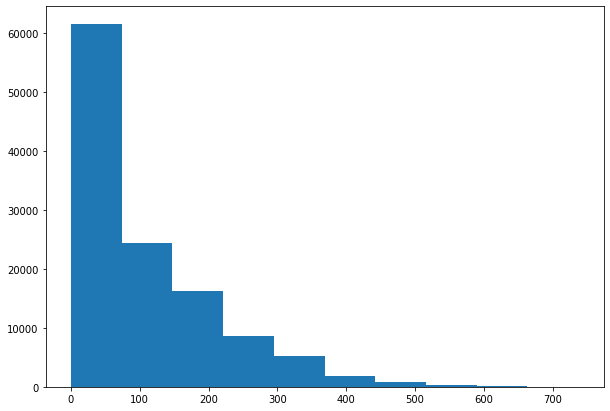

In [ ]:
plt.figure(figsize=(10,7))
plt.hist(data = df4, x='lead_time')
plt.show()

Terlihat bahwa persebaran data lead_time memiliki persebaran positif list skew yang mana lead_time dengan nilai lebih dari 400 memiliki frekuensi yang sedikit sehingga lead_time dengan nilai lebih dari 400 akan di groupkan menjadi 401

In [ ]:
df4['lead_times'] = np.where(df4['lead_time'] > 400, 401, df4['lead_time'])

In [ ]:
bins = list(np.arange(0,max(df4['lead_times'])+30, 30))
labels = ["{0}-{1}".format(str(bins[x]), str(bins[x+1])) for x in range(len(bins[:-1]))]
df4['lead_time_group'] = pd.cut(df4['lead_times'],bins=bins, include_lowest=True, labels=labels) # groupping lead_time untuk setiap kelipatan 30

Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel (Hint: Perhatikan proporsi dari pemesanan yang dibatalkan)

In [ ]:
df4_group = df4.groupby(['hotel', 'is_canceled', 'lead_time_group']).agg({'arrival_date_month': ['count']}).reset_index()
df4_group.columns = ['hotel_type', 'is_canceled', 'lead_time_group', 'total_booking']
df4_group

,hotel_type,is_canceled,lead_time_group,total_booking
0,City Hotel,0,0-30,18060
1,City Hotel,0,30-60,7266
2,City Hotel,0,60-90,5210
3,City Hotel,0,90-120,3956
4,City Hotel,0,120-150,3064
5,City Hotel,0,150-180,2442
6,City Hotel,0,180-210,1800
7,City Hotel,0,210-240,1224
8,City Hotel,0,240-270,880
9,City Hotel,0,270-300,660


In [ ]:
df4_pivot = df4_group.pivot_table(index=['hotel_type', 'lead_time_group'], columns='is_canceled', values='total_booking').reset_index()
df4_pivot

is_canceled,hotel_type,lead_time_group,0,1
0,City Hotel,0-30,18060,5184
1,City Hotel,30-60,7266,4608
2,City Hotel,60-90,5210,3692
3,City Hotel,90-120,3956,3486
4,City Hotel,120-150,3064,2542
5,City Hotel,150-180,2442,2716
6,City Hotel,180-210,1800,1793
7,City Hotel,210-240,1224,1280
8,City Hotel,240-270,880,1237
9,City Hotel,270-300,660,1859


In [ ]:
df4_pivot['percentage_cancel'] = round((df4_pivot[1]/(df4_pivot[0]+df4_pivot[1]))*100,2)
df4_pivot

is_canceled,hotel_type,lead_time_group,0,1,percentage_cancel
0,City Hotel,0-30,18060,5184,22.30
1,City Hotel,30-60,7266,4608,38.81
2,City Hotel,60-90,5210,3692,41.47
3,City Hotel,90-120,3956,3486,46.84
4,City Hotel,120-150,3064,2542,45.34
5,City Hotel,150-180,2442,2716,52.66
6,City Hotel,180-210,1800,1793,49.90
7,City Hotel,210-240,1224,1280,51.12
8,City Hotel,240-270,880,1237,58.43
9,City Hotel,270-300,660,1859,73.80


Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel (Hint: Perhatikan jenis plot yang digunakan)

Text(-0.5, 102, 'Resort Hotel has quite stagnant (in around 40%) canceled ratio, while City Hotel has quite high canceled \nratio (above 60%) with leads time around 1 year')

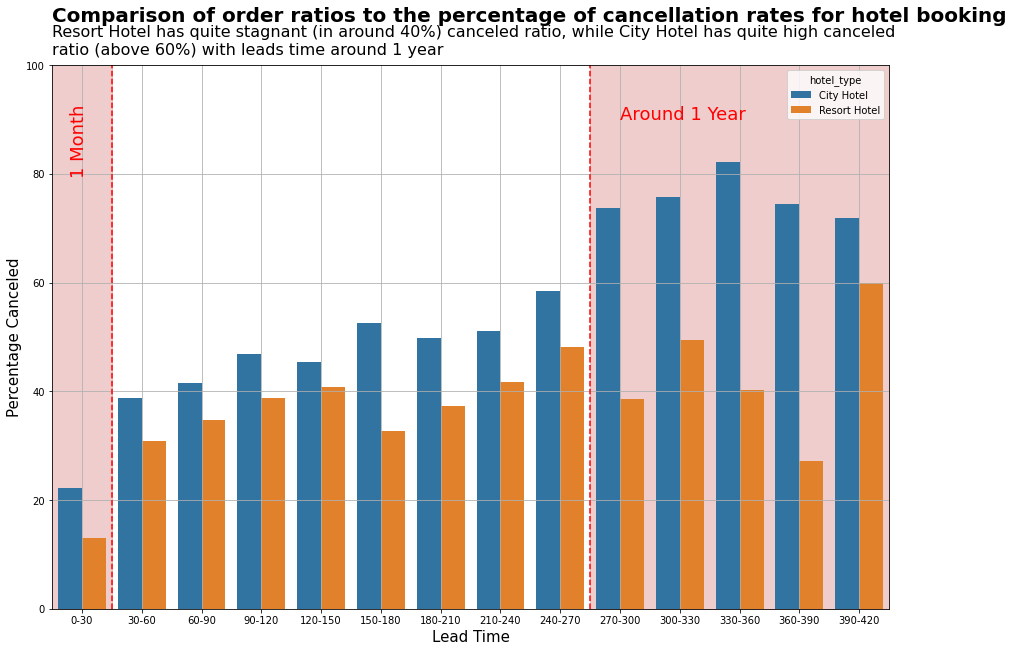

In [ ]:
plt.figure(figsize=(15,10)) # mengatur ukuran figure
sns.barplot(x='lead_time_group', y='percentage_cancel', hue='hotel_type', data=df4_pivot)
plt.grid()

plt.xlabel('Lead Time', fontsize=15)
plt.ylabel('Percentage Canceled', fontsize=15) 
plt.ylim(0, 100) # membatasi sumbu y
plt.xlim(-0.5,13.5) # membatasi x-axis

plt.axvline(0.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=-0.2, y=80, s='1 Month', fontsize=18, color='red', rotation=90) # menambahkan teks keterangan
plt.stackplot(np.arange(-0.5,1.5,1), [[100]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.axvline(8.5, ls='--', color='red') # membuat garis vertikal untuk menghighlight insight
plt.text(x=9, y=90, s='Around 1 Year', fontsize=18, color='red') # menambahkan teks keterangan
plt.stackplot(np.arange(8.5,14.5,1), [[100]], color='indianred', alpha=0.3) # memberikan blok warna pada area yang dihighlight 2 garis vertikal

plt.text(x=-0.5, y=108, s="Comparison of order ratios to the percentage of cancellation rates for hotel booking", 
         fontsize=20, fontweight='bold') # memberikan judul yang informatif
plt.text(x=-0.5, y=102, s="Resort Hotel has quite stagnant (in around 40%) canceled ratio, while City Hotel has quite high canceled \nratio (above 60%) with leads time around 1 year", 
         fontsize=16) # memberikan keterangan tambahan atas judul

**Insight/Analisis:**

Analisis ini berfokus untuk melihat trend antara waktu tunggu (jarak waktu pemesanan hotel hingga waktu kedatangan) dan tingkat pembatalan pemesanan hotel.

Tingkat pembatalan pemesanan paling rendah ada pada pemesanan yang memiliki waktu tunggu kurang dari 30 hari dan berlaku untuk kedua jenis hotel. Hotel resort cukup stagnan dengan nilai 40% rasio pembatalan, sedangkan hotel jenis perkotaan memiliki rasio yang cukup tinggi 60% Ketika waktu tunggu sekitar 1 tahun.

